<a href="https://colab.research.google.com/github/vsolodkyi/NeuralNetworks_SkillBox/blob/main/module_13/mid_ml_nlp_hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 3 

### Задание начального уровня

Потренируйтесь в нахождении матрицы схожести для валидационного сета

* загрузите `brand_tweets_valid.csv`
* примените объект `vectorizer`, обученный на датасете `brand_tweets.csv` (просто скопируйте этот код из урока)
* примените функцию `pairwise_distances` к полученной матрице

In [16]:
import pandas as pd

df_valid = pd.read_csv('data/brand_tweets_valid.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df_valid.drop(df_valid[df_valid.tweet_text.isnull()].index, inplace=True)

### YOUR CODE HERE ###



In [3]:
import nltk
import string

# дополнительный словарь со знаками пунктуации
nltk.download('punkt', download_dir='.')

[nltk_data] Downloading package punkt to ....
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
df = pd.read_csv('data/brand_tweets.csv', sep=',', encoding='utf8')
# удаляем строки, в которых отсутствует текст твита
df.drop(df[df.tweet_text.isnull()].index, inplace=True)

In [5]:
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'shold',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
]

In [6]:
def tokenize_text(raw_text: str):
    """Функция для токенизации текста
    
    :param raw_text: исходная текстовая строка
    """
    tokenized_str = nltk.word_tokenize(raw_text)
    tokens = [i.lower() for i in tokenized_str if ( i not in string.punctuation )]
    filtered_tokens = [i for i in tokens if ( i not in stop_words )]
    return filtered_tokens

# применяем функцию в датафрейму с помощью метода .apply()
tokenized_tweets= df.tweet_text.apply(tokenize_text)

# добавляем новую колонку в исходный датафрейм
df = df.assign(
    tokenized=tokenized_tweets
)

df.tokenized.head()

0    [wesley83, 3g, iphone, 3, hrs, tweeting, rise_...
1    [jessedee, know, fludapp, awesome, ipad/iphone...
2    [swonderlin, wait, ipad, 2, also, should, sale...
3    [sxsw, hope, year, 's, festival, n't, crashy, ...
4    [sxtxstate, great, stuff, fri, sxsw, marissa, ...
Name: tokenized, dtype: object

In [17]:
tokenized_vaidtweets = df_valid.tweet_text.apply(tokenize_text)
df_valid = df_valid.assign(
    tokenized=tokenized_vaidtweets
)

df_valid.tokenized.head()

0    [wow, google, maps, mobile, v5, demo, sxsw, nice]
1    [google, name, built, gettinng, stuff, trying,...
2    [quot, apple, opening, temporary, store, austi...
3    [tech, apple, opening, pop-up, store, austin, ...
4              [gsdm, google, party, hook, sxsw, link]
Name: tokenized, dtype: object

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# инициализируем объект, который токенизирует наш текст
# в качестве единственного аргимента передаём функцию, которую мы написали в Уроке 2
# на разбивает каждый документ на токены
vectorizer = CountVectorizer(tokenizer=tokenize_text)
# применяем наш объект-токенизатор к датафрейму с твитами
document_matrix = vectorizer.fit_transform(df.tweet_text.values)
# результат - матрица, в которой находятся числа, строк в мастрице столько, сколько документов
# а столбцов столько, сколько токенов
document_matrix

<3904x7260 sparse matrix of type '<class 'numpy.int64'>'
	with 46060 stored elements in Compressed Sparse Row format>

In [18]:
document_valid_matrix = vectorizer.fit_transform(df_valid.tweet_text.values)
document_valid_matrix

<402x1760 sparse matrix of type '<class 'numpy.int64'>'
	with 4927 stored elements in Compressed Sparse Row format>

<1x1760 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.metrics import pairwise_distances

tweet_distance = 1-pairwise_distances(document_matrix, metric="cosine")

tweet_distance.shape

(3904, 3904)

In [19]:
tweet_valid_distance = 1-pairwise_distances(document_valid_matrix, metric="cosine")

tweet_valid_distance.shape

(402, 402)

In [13]:
source_tweet_index = 0
print(df.iloc[source_tweet_index].tweet_text)

.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.


In [14]:
import numpy as np

# отсортируем твиты по “похожести” - чем похожее на source_tweet_index,
# тем ближе к началу списка sorted_similarity
sorted_similarity = np.argsort(-tweet_distance[source_tweet_index,:])

sorted_similarity

array([   0,  633,  420, ..., 2861,  287, 1330])

### Задание среднего уровня

Пользуясь матрицей схожести, полученной на предыдущем этапе, найдите top-5 твитов, похожих на твит валидационного сета с `id=14`.

In [21]:
test_tweet_index = 14

print(df_valid.iloc[test_tweet_index].tweet_text+'\n------------------------------\n')


### YOUR CODE HERE ###
sorted_valid_similarity = np.argsort(-tweet_valid_distance[test_tweet_index,:])

print(df_valid.iloc[sorted_valid_similarity[1]].tweet_text)
print('-------------')
print(df_valid.iloc[sorted_valid_similarity[2]].tweet_text)
print('-------------')
print(df_valid.iloc[sorted_valid_similarity[3]].tweet_text)
print('-------------')
print(df_valid.iloc[sorted_valid_similarity[4]].tweet_text)
print('-------------')
print(df_valid.iloc[sorted_valid_similarity[5]].tweet_text)

Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
------------------------------

Apple employees just showed up in force to the #SXSW PopUp Apple Store. #iPad2
-------------
#sxsw apple store run out for the day :( boo apple.
-------------
video from the popup Apple store: {link} #sxsw #sxswi
-------------
#SXSW Apple Pop Up Store still has iPads in stock, we are waiting on line {link} via @mention #apple #ipad2‰Ыќ
-------------
Wanting in line at the unconfirmed Apple pop-up store for an iPad 2. #sxsw


In [88]:
np.sort(-tweet_valid_distance[test_tweet_index,:])[:5]

array([-1.        , -0.5118907 , -0.48507125, -0.45834925, -0.42443734])

### Задание высокого уровня.

У вас есть матрица схожести между объектами. Попробуйте решить задачу поиска дубликатов в тексте

1. Визуализируйте гистограмму значений в матрице схожести.
1. Напишите функцию на Python, которая принимает индекс твита, пороговое значение (число от $0.0$ до $1.0$ и матрицу схожести, а затем выводит все твиты, схожесть которых больше, чем пороговое значение.

In [25]:
### YOUR CODE HERE ###
from matplotlib import pyplot as plt

%matplotlib inline


### YOUR CODE HERE ###



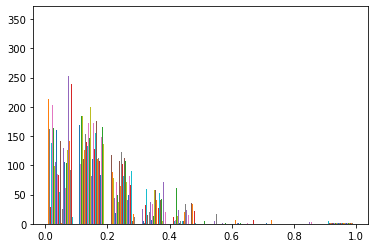

In [27]:
plt.hist(tweet_valid_distance)
plt.show()

In [78]:
threshold = 0.4 # user assign less 1 and more 0
input_tweet_index = 14 #integer between 0 and length train tweets - 401

In [86]:

#similarity_matrix = {}
def sim_phrases(threshold=1.0, input_tweet_index=0):
    print('User asked for index = {0}, phrase is {1}'.format(input_tweet_index, df_valid.iloc[input_tweet_index].tweet_text))
    temp_similarity = np.argsort(-tweet_valid_distance[input_tweet_index,:])
    filter_temp_similarity = [(x,tweet_valid_distance[input_tweet_index,x] )  for x in temp_similarity if tweet_valid_distance[input_tweet_index,x]  >= threshold]

    for i, koef in filter_temp_similarity:
      if i != input_tweet_index:
        print('      KOEF = {0}, PHRASE is {1}'.format(koef, df_valid.iloc[i].tweet_text))

In [87]:
sim_phrases(threshold=threshold, input_tweet_index=input_tweet_index)

User asked for index = 14, phrase is Popup Apple Store crew has been giving out water to the people in line but they are in street clothes. No Apple logos anywhere yet. #SXSW
      KOEF = 0.5118906968889915, PHRASE is Apple employees just showed up in force to the #SXSW PopUp Apple Store. #iPad2
      KOEF = 0.4850712500726658, PHRASE is #sxsw apple store run out for the day :( boo apple.
      KOEF = 0.45834924851410563, PHRASE is video from the popup Apple store: {link} #sxsw #sxswi
      KOEF = 0.4244373438135828, PHRASE is #SXSW Apple Pop Up Store still has iPads in stock, we are waiting on line {link} via @mention #apple #ipad2‰Ыќ
      KOEF = 0.40422604172722154, PHRASE is Wanting in line at the unconfirmed Apple pop-up store for an iPad 2. #sxsw
